# Avocada Prices Prediction

### Identify The Problem
Given the data set with the [avocado prices](https://www.kaggle.com/neuromusic/avocado-prices) from 2015 to 2018, we will predict the prices using xgboost.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv', index_col=0)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [4]:
df.shape

(18249, 13)

In [5]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [7]:
df.value_counts('year')

year
2017    5722
2016    5616
2015    5615
2018    1296
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


###  Distribution

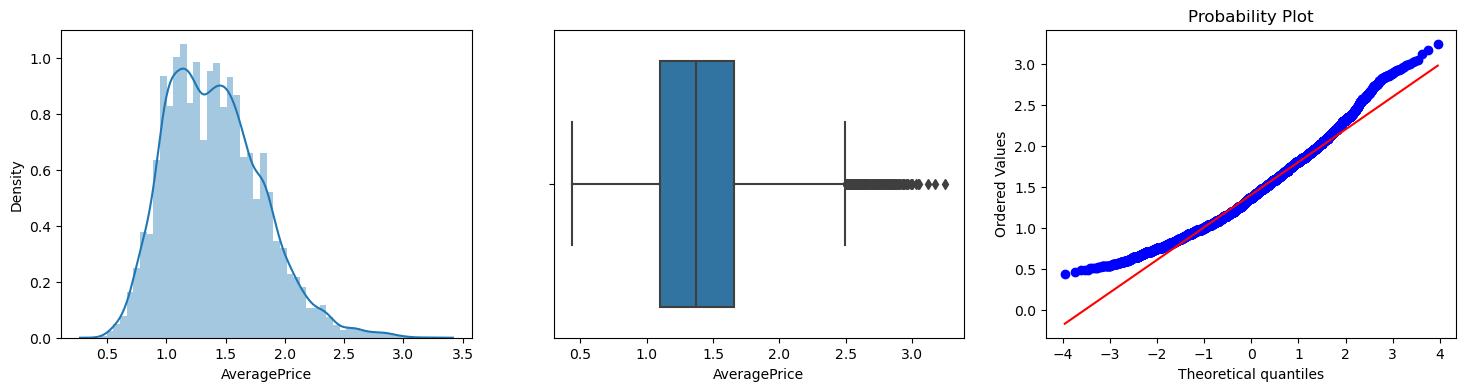

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
sns.distplot(df.AveragePrice, ax=ax[0])
sns.boxplot(df.AveragePrice, ax=ax[1])
from scipy import stats
stats.probplot(df['AveragePrice'], plot=ax[2])
plt.show()

Conclusion: It's Bimodal distribution because it is conventional versus organic.

In [10]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

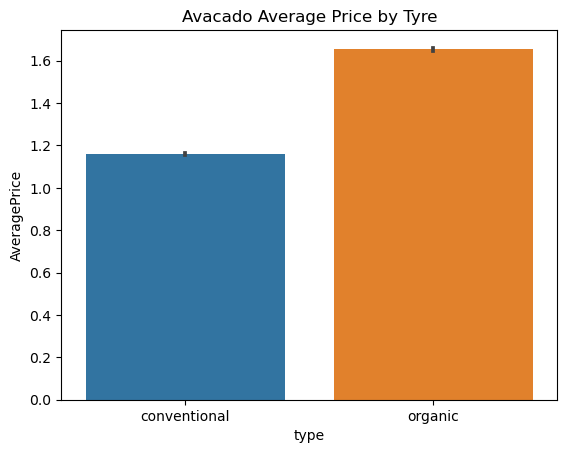

In [11]:
plt.figure()
plt.title('Avacado Average Price by Tyre')
sns.barplot(x='type', y='AveragePrice', data=df)
plt.show()

In [12]:
conventional = len(df[df['type'] == 'conventional'])
conventional

9126

In [13]:
organic = len(df[df['type'] == 'organic'])
organic

9123

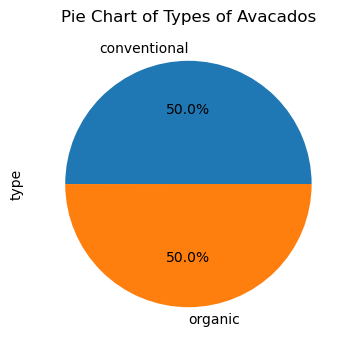

In [14]:
plt.figure(figsize=(14,7))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4,4))
plt.title('Pie Chart of Types of Avacados')
plt.show()
    

Conclusion: data is 50% conventional and 50% organic.

In [15]:
print('Skewness: %f' % df['AveragePrice'].skew())

Skewness: 0.580303


Acceptable values of skewness fall between -3 to +3

In [16]:
print('Kustosis: %f' % df['AveragePrice'].kurt())

Kustosis: 0.325196


Kustosis is appropriate from a range of -10 to +10

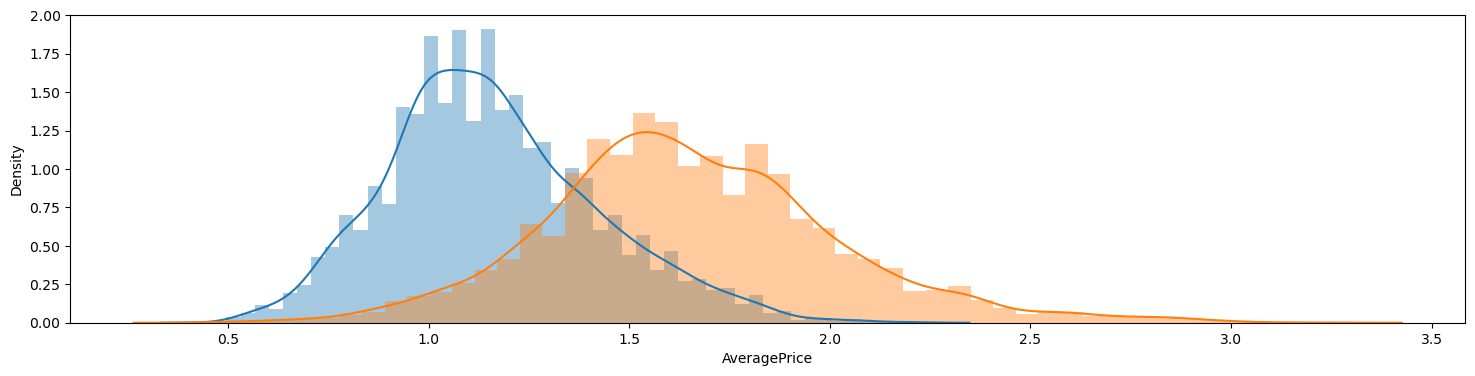

In [17]:
#conventinal shape
df_conventional = df[df['type'] == 'conventional']
# organic shape
df_organic = df[df['type'] == 'organic']

f, ax = plt.subplots(1, 1, figsize=(18, 4))
sns.distplot(df_conventional['AveragePrice'])
sns.distplot(df_organic['AveragePrice'])
plt.show()

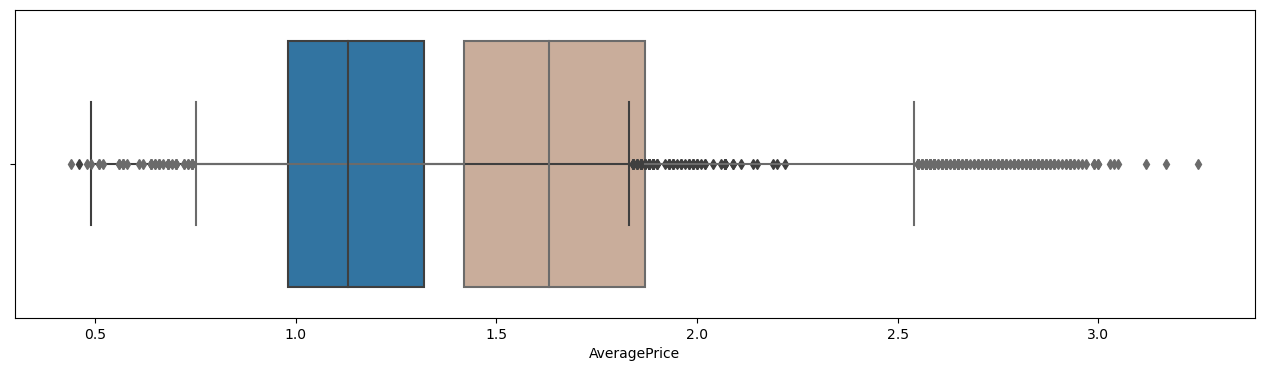

In [18]:
f, ax = plt.subplots(1, 1, figsize=(16,4))
sns.boxplot(df_conventional['AveragePrice'])
sns.boxplot(df_organic['AveragePrice'], palette = 'pink')
plt.show()

But now we need to know what other features are driving up the price? Maybe the region?

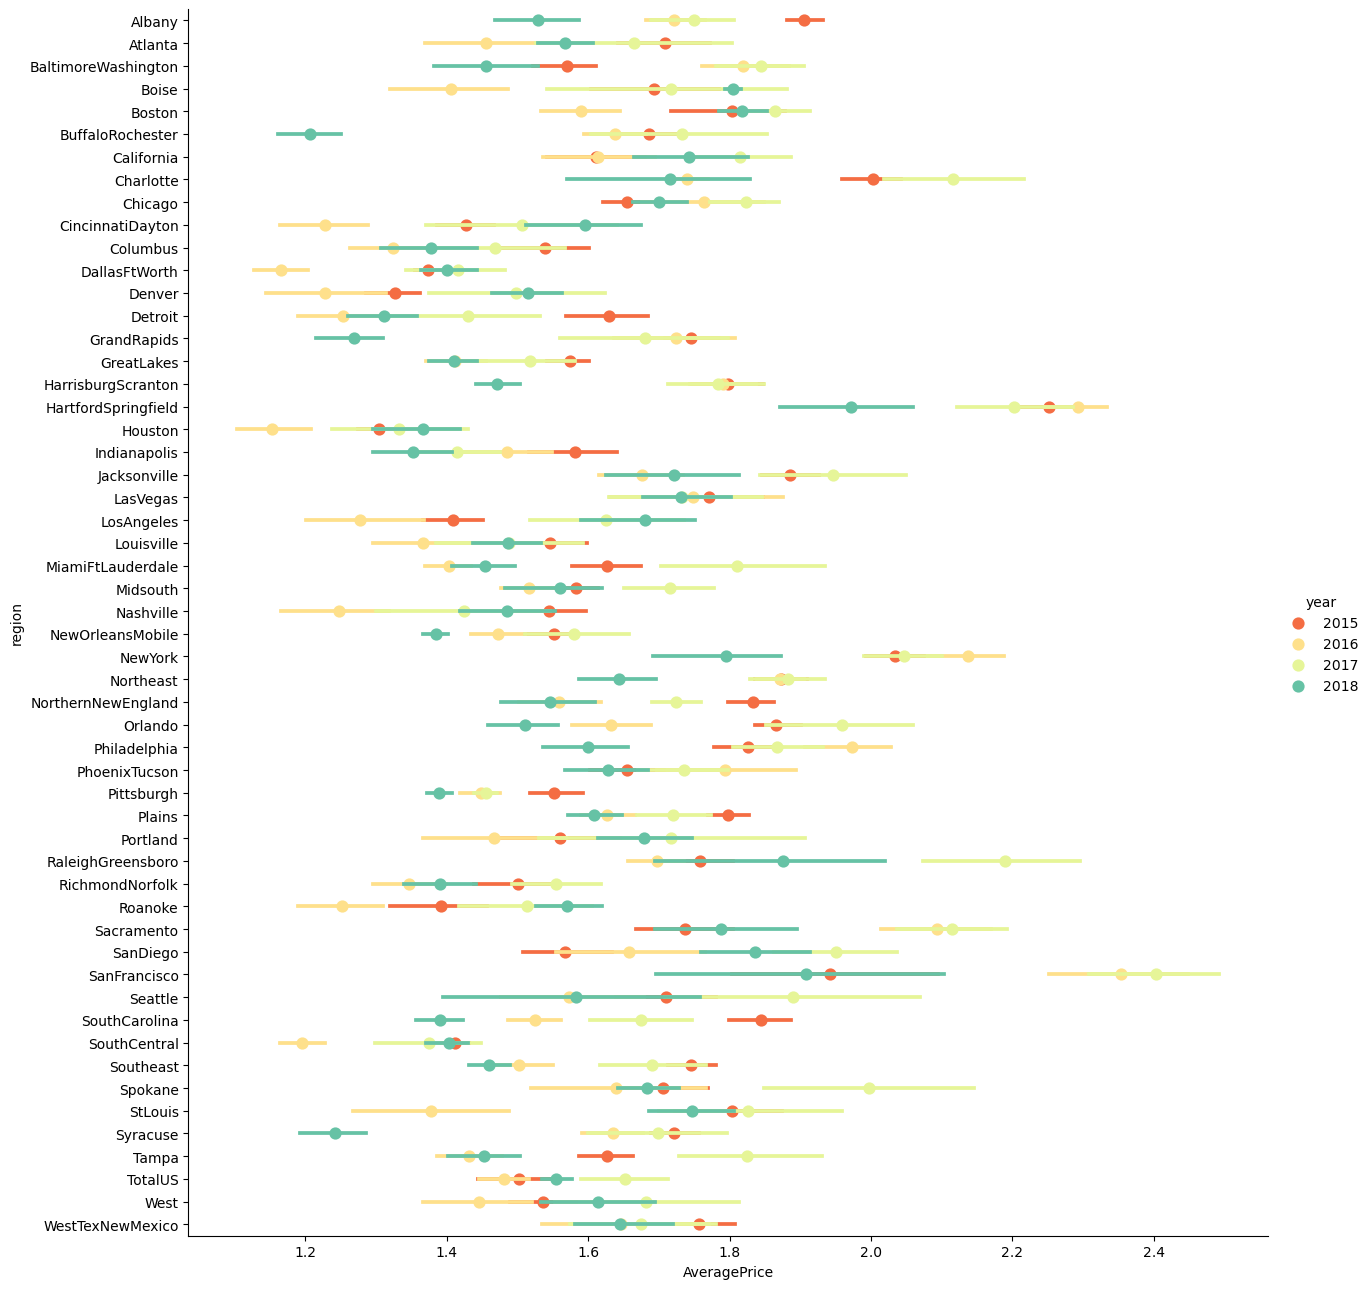

In [19]:
mask = df['type']== 'organic'
g = sns.factorplot('AveragePrice', 'region', data=df[mask], 
                  hue='year', size=13, ascpect=0.8, palette='Spectral', join=False)

Conclusion. The price not only depends on the type, but also on the region

### Feature Importance

<AxesSubplot:title={'center':'Correlation Matrix'}>

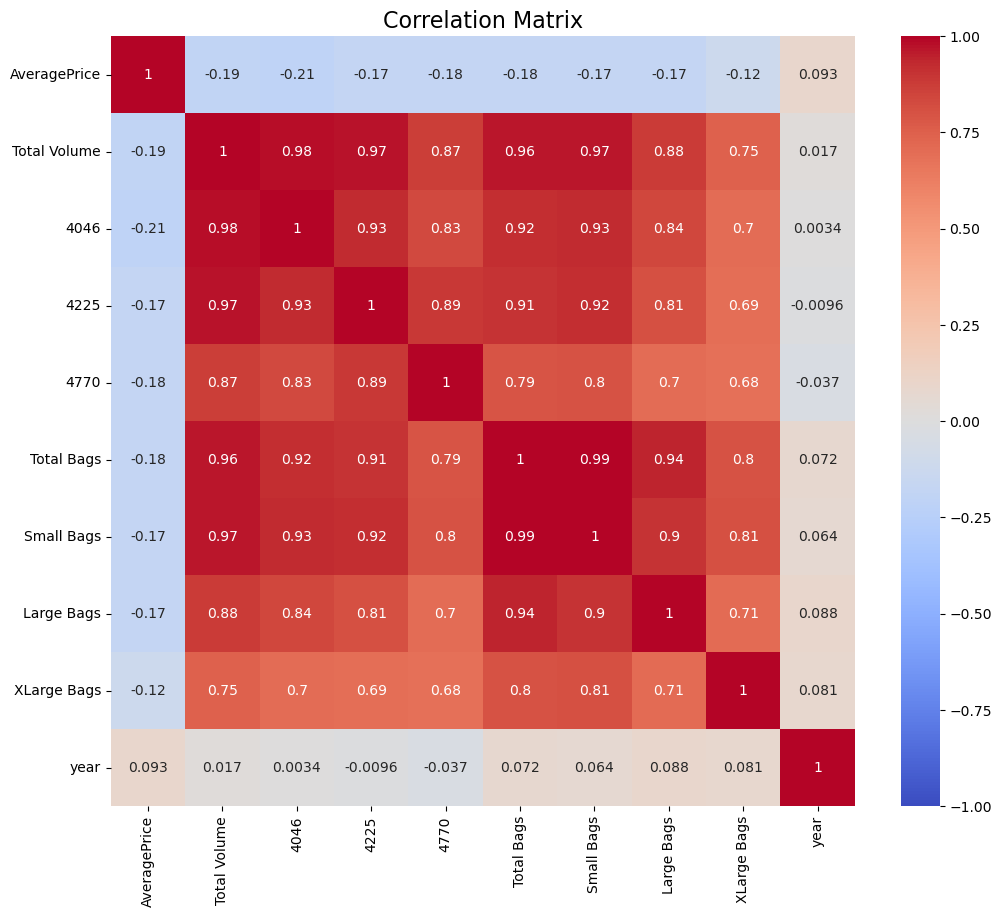

In [20]:
corrmat = df.corr()
f, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_title('Correlation Matrix', fontsize=16)
filter = df.columns !='id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)

In [21]:
df.duplicated().sum()

0

### Missing Data

In [23]:
print(f"Missing Data: {df.isna().sum(axis=0).any()}")

Missing Data: False


In [24]:
df['type'] = df['type'].map({'conventional':0, 'organic':1})

# Extracting month from date column
df.Date = df.Date.apply(pd.to_datetime)
df['Month'] = df['Date'].apply(lambda x:x.month)
df.drop('Date', axis=1, inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [25]:
df['Month'].value_counts()

JAN      1944
MARCH    1836
FEB      1728
OCT      1512
JULY     1512
MAY      1512
NOV      1404
AUG      1404
APRIL    1404
DEC      1403
SEPT     1296
JUNE     1294
Name: Month, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.9+ MB


### Select the Model

In [27]:
# Creating dummy variables
dummies = pd.get_dummies(df[['year', 'region', 'Month']], drop_first=True)
df_dummies = pd.concat([df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
                           'XLarge Bags', 'type']], dummies], axis=1)
target = df['AveragePrice']

# Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_dummies, target, test_size=0.30)

# standardizing the data
cols_to_std = ['Total Volume', '4046',  '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
                           'XLarge Bags'] 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

### Evaluate the model

In [28]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = XGBRegressor()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, Y_train)
print('Training score :', score)
score = model.score(X_test, Y_test)
print('Test Score :', score)
output = pd.DataFrame({'Predicted': Y_pred})
output

Training score : 0.9541182534126788
Test Score : 0.8863682779025985


,Predicted
0,1.122817
1,1.737793
2,1.574431
3,1.721921
4,1.621528
...,...
5470,1.458713
5471,2.358974
5472,1.292889
5473,1.948790


In [29]:
print(output.head())
people = output.loc[output.Predicted == 1]['Predicted']

   Predicted
0   1.122817
1   1.737793
2   1.574431
3   1.721921
4   1.621528


### Conclusion 

In [30]:
mae = np.round(mean_absolute_error(Y_test, Y_pred), 3) 
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  0.097


In [31]:
mse = np.round(mean_squared_error(Y_test, Y_pred), 3)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.018


In [32]:
score = np.round(r2_score(Y_test, Y_pred), 3)
print('R2 score: ', score)

R2 score:  0.886


XGBoost has a score of 89% which is pretty good score.